In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive



Analyzing data from file: X_train_NHkHMNU.csv
                ID       DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  \
count  1494.000000  1494.000000     1494.000000     1494.000000   
mean   1072.759036   591.861446        0.427442       -0.020032   
std     618.013179   345.065043        0.673412        0.918995   
min       0.000000     0.000000       -2.265563       -1.462350   
25%     540.250000   292.250000       -0.037421       -0.716771   
50%    1077.500000   591.000000        0.357061       -0.394166   
75%    1597.500000   885.750000        0.922057        0.650533   
max    2146.000000  1215.000000        2.033851        3.300640   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count     1469.000000     1469.000000    1370.000000    1424.000000   
mean        -0.145508        0.145508      -0.256332      -0.072643   
std          0.970226        0.970226       0.957443       1.075830   
min         -2.856874       -2.634831      -2.464849      -2.8253

<ipython-input-7-d8c3619cb3c2>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, figsize=(12, 8))


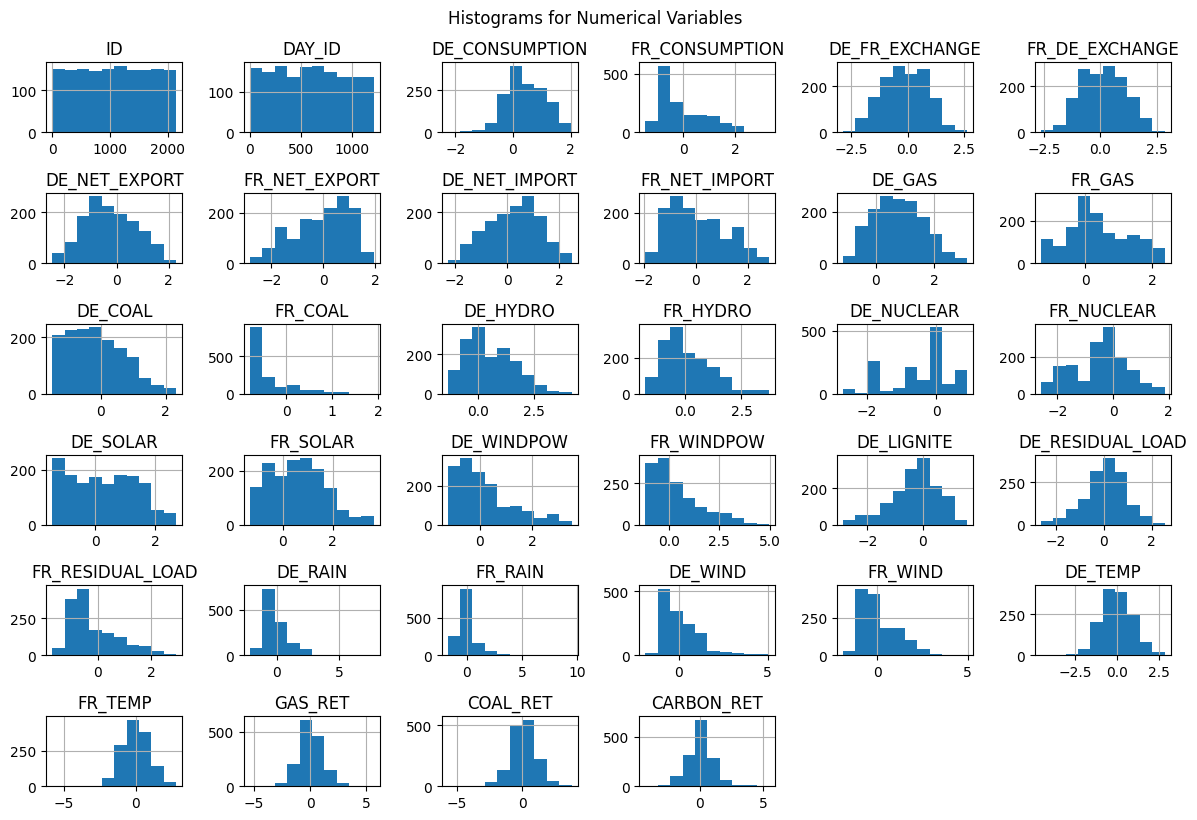

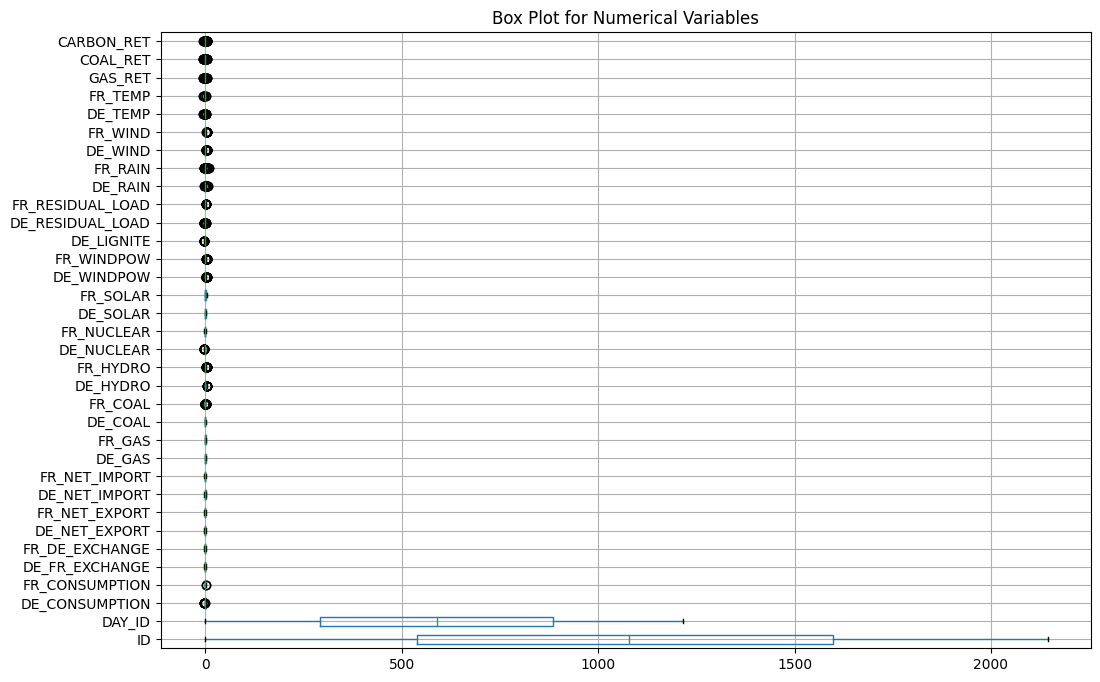

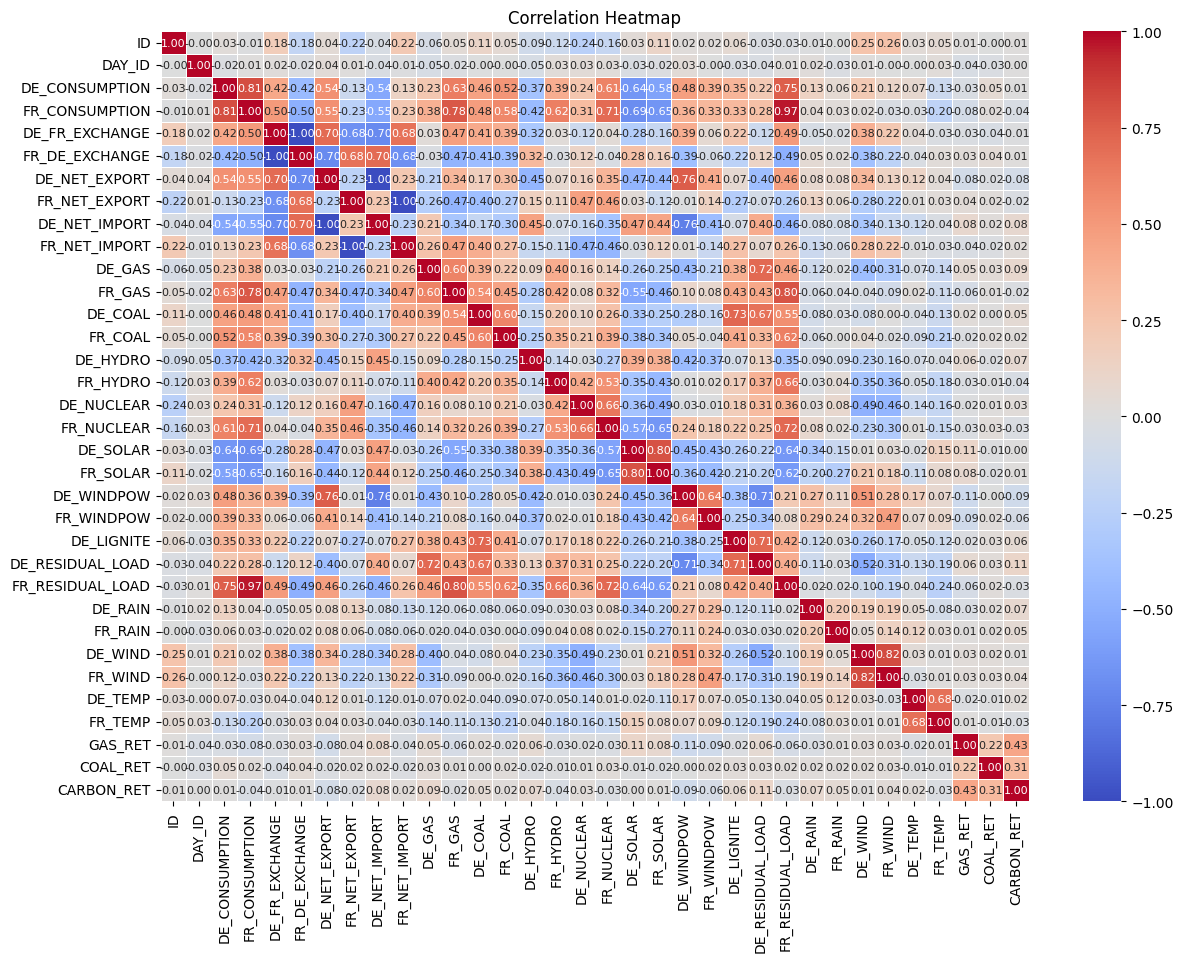

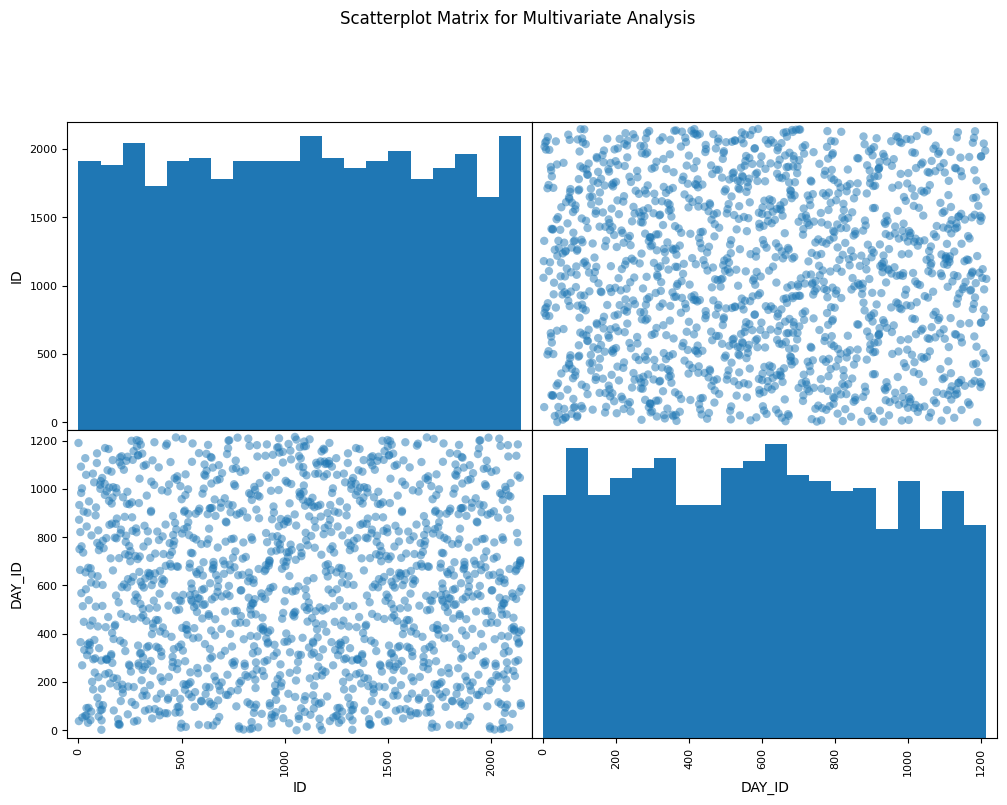


Analyzing data from file: y_train_ZAN5mwg.csv
                ID       TARGET
count  1494.000000  1494.000000
mean   1072.759036     0.089934
std     618.013179     1.034582
min       0.000000    -6.519268
25%     540.250000    -0.219861
50%    1077.500000     0.000000
75%    1597.500000     0.269719
max    2146.000000     7.786578


<ipython-input-7-d8c3619cb3c2>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, figsize=(12, 8))


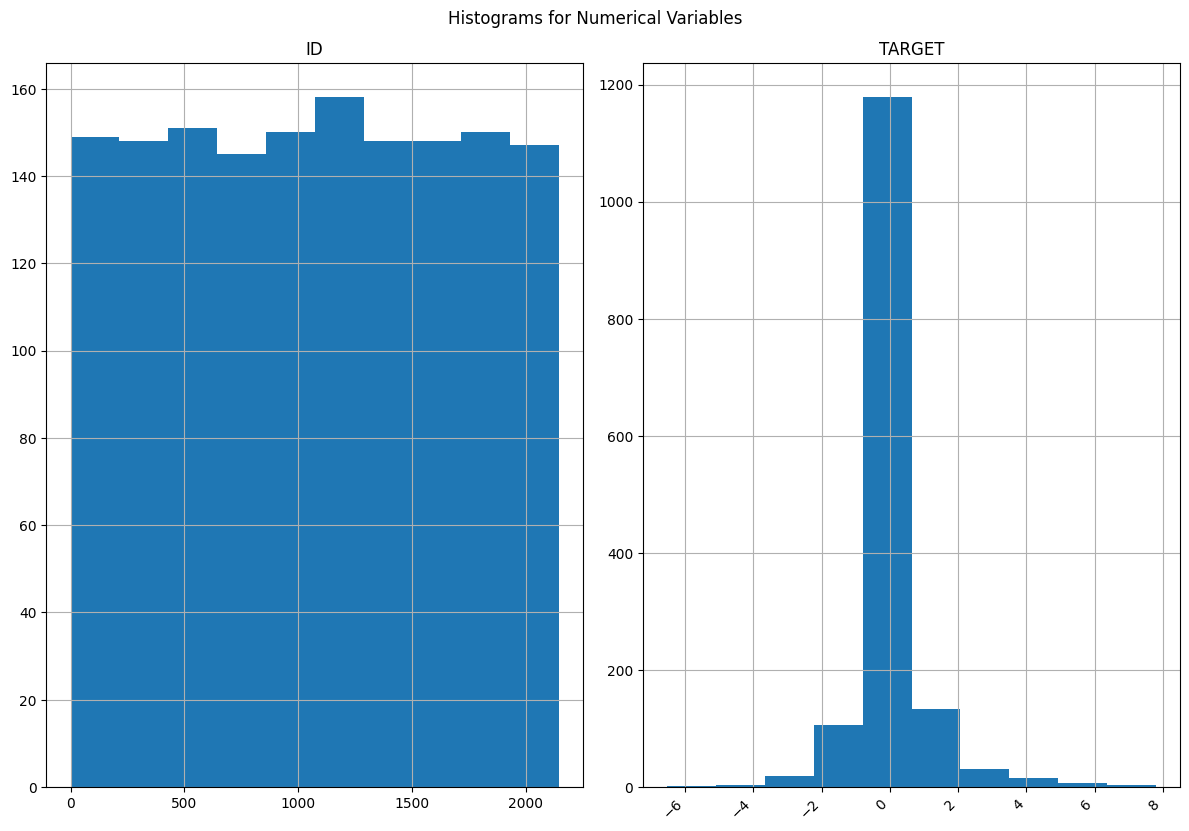

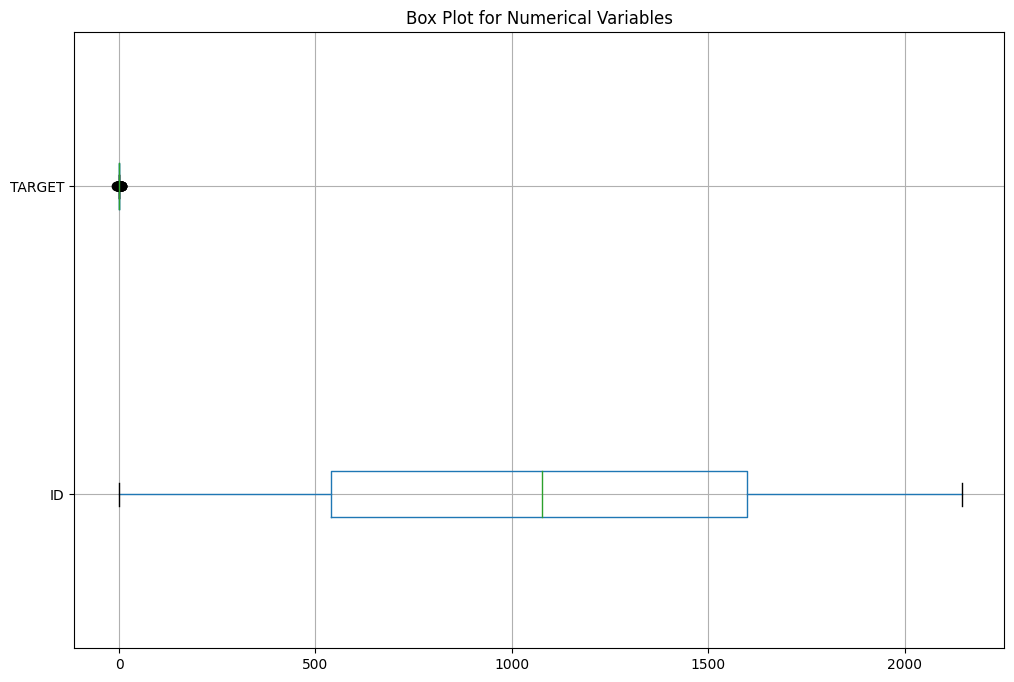

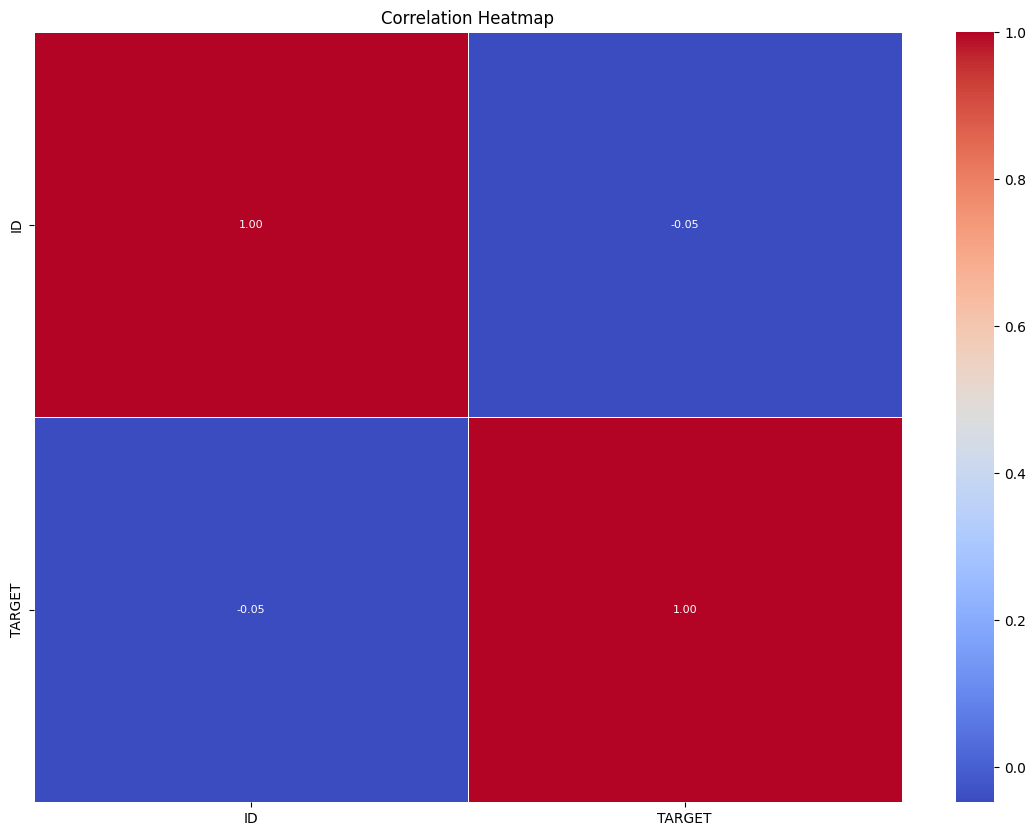

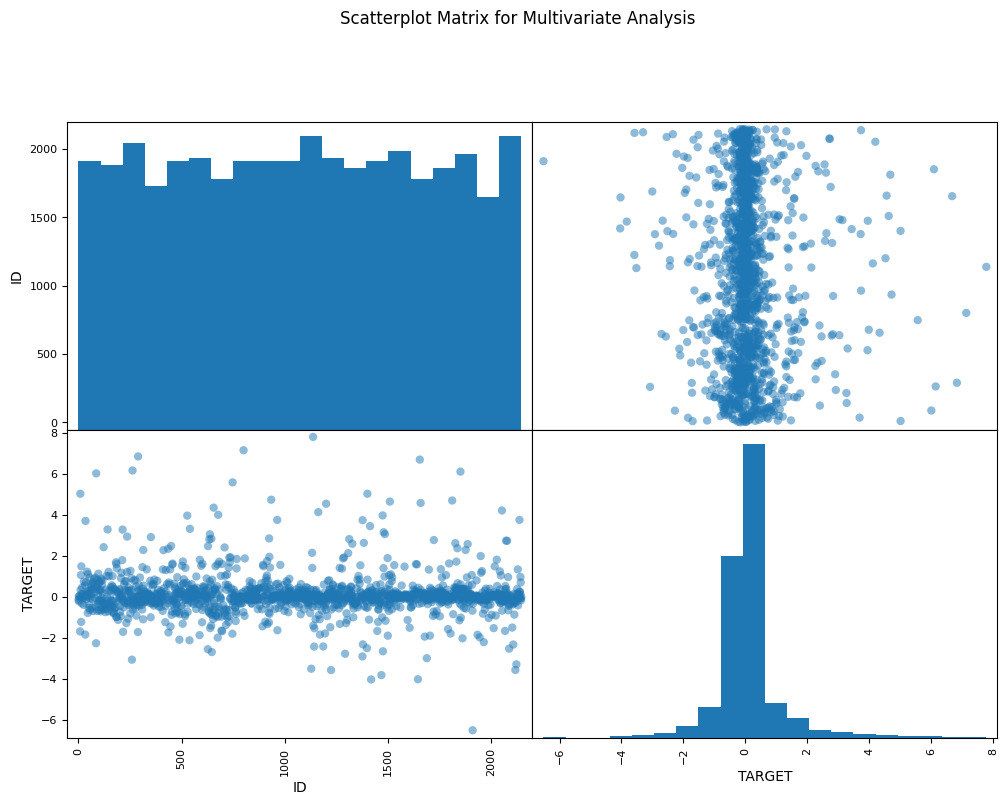


Analyzing data from file: X_test_final.csv
                ID       DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  \
count   654.000000   654.000000      654.000000      654.000000   
mean   1075.192661   632.744648        0.435242        0.034431   
std     625.699109   356.751037        0.802119        0.985306   
min       1.000000     4.000000       -7.433311       -4.591011   
25%     528.500000   334.000000        0.045064       -0.718746   
50%    1060.500000   633.500000        0.365394       -0.363841   
75%    1631.500000   952.000000        0.986764        0.815481   
max    2147.000000  1214.000000        1.851717        2.817944   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count      645.000000      645.000000     607.000000     630.000000   
mean        -0.044960        0.044960      -0.221057      -0.124737   
std          0.900125        0.900125       0.943074       1.005925   
min         -2.226614       -2.437265      -2.413888      -2.532384 

<ipython-input-7-d8c3619cb3c2>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, figsize=(12, 8))


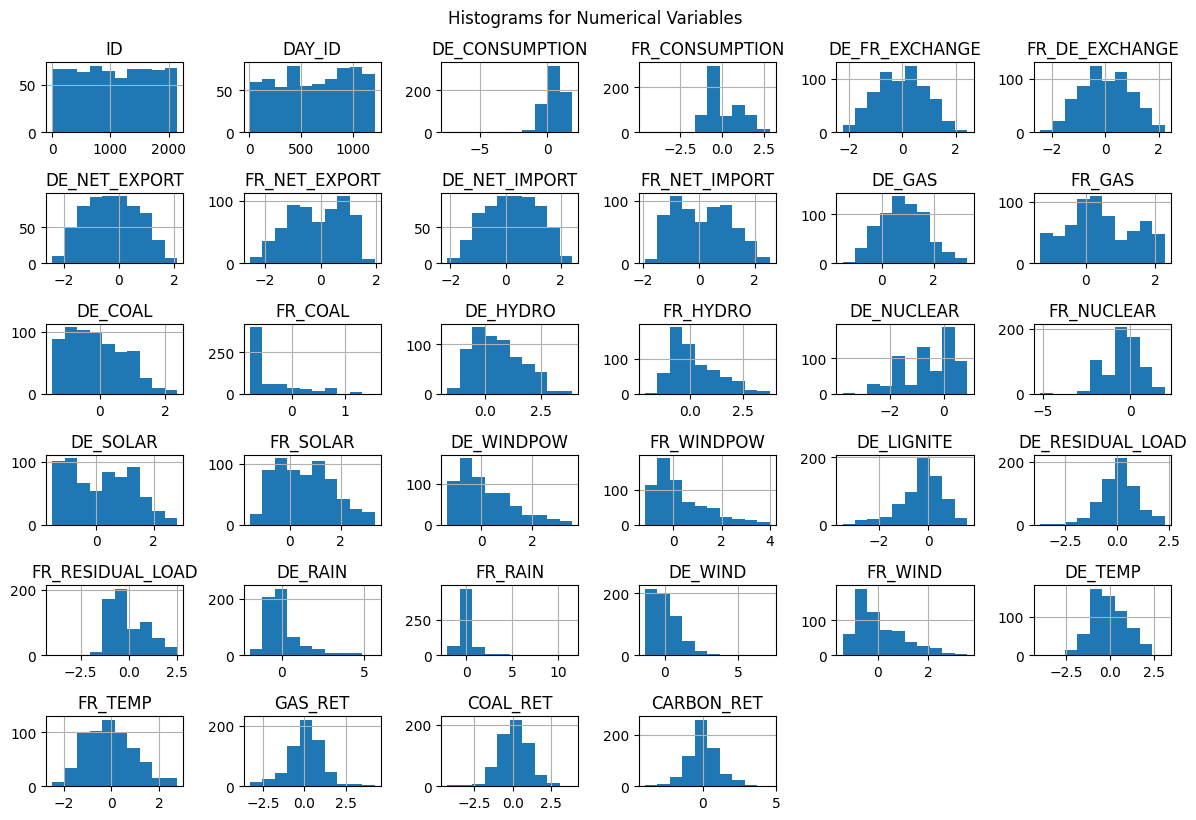

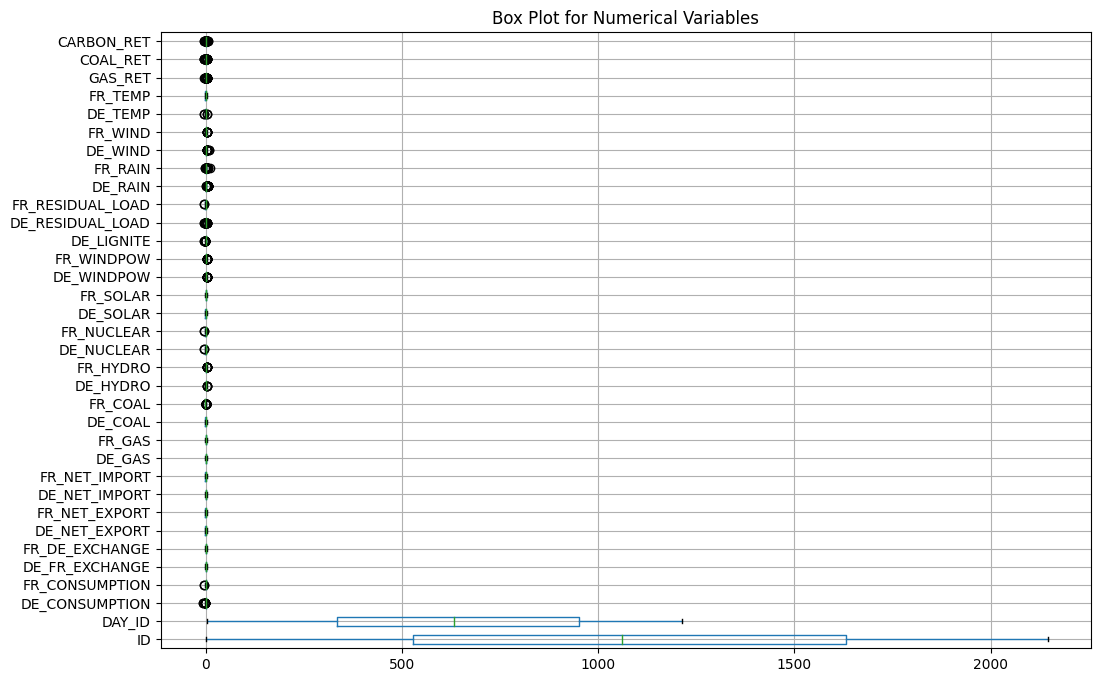

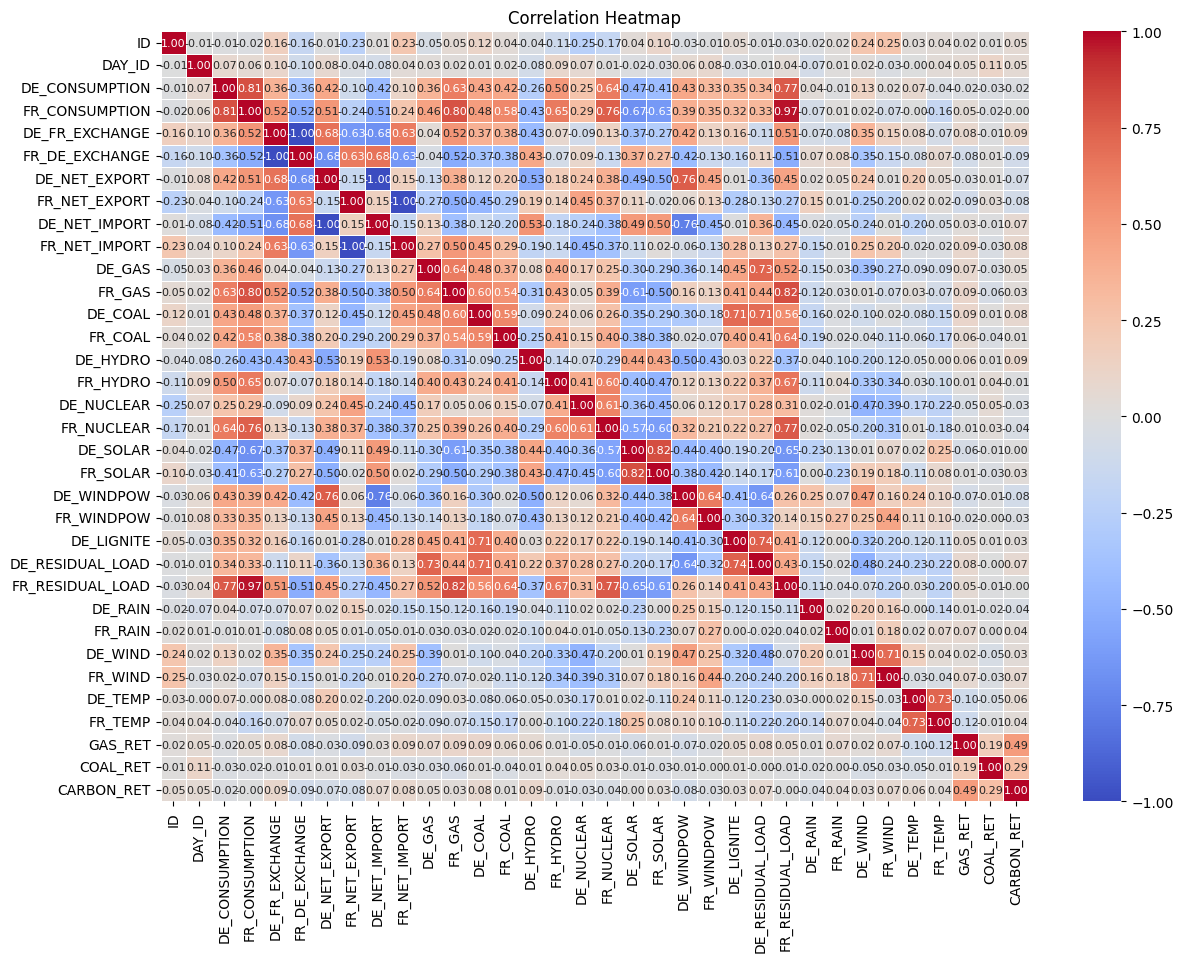

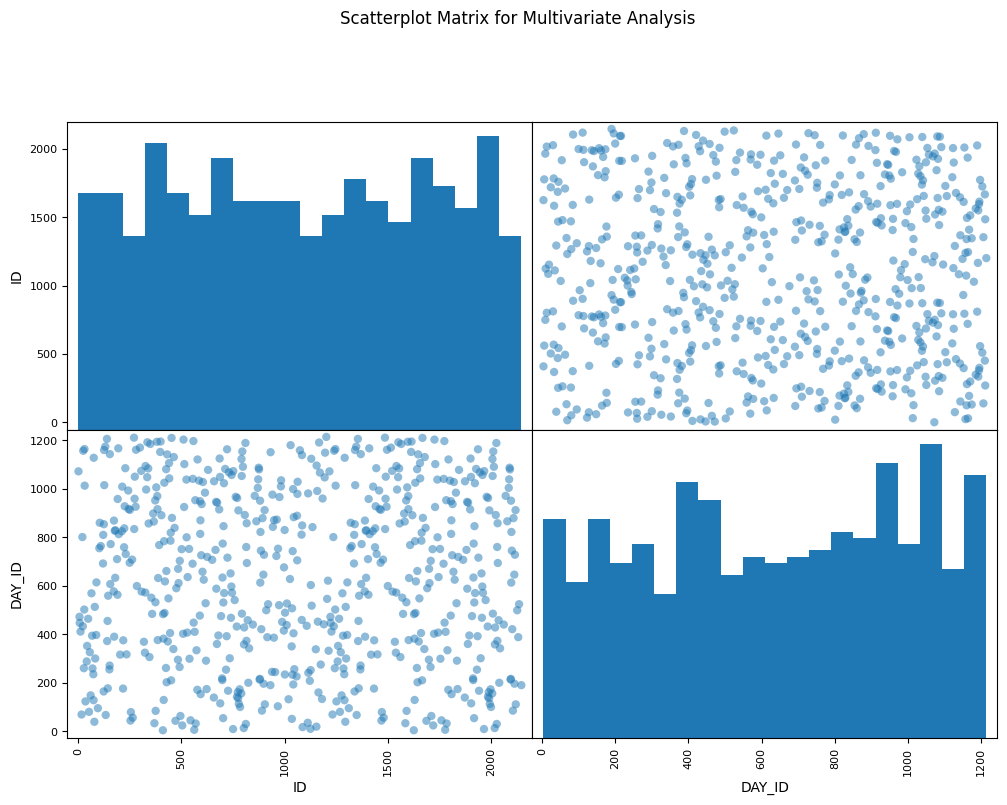

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(file_path):
    df = pd.read_csv(file_path)

    # Display basic statistics
    print(df.describe())

    # Histograms for Numerical Variables
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    df.hist(ax=ax, figsize=(12, 8))

    # Adjust layout and rotation of x-axis tick labels
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')

    plt.suptitle('Histograms for Numerical Variables', y=1.02)
    plt.show()

    # Box Plot for Numerical Variables
    df.boxplot(figsize=(12, 8), vert=False)
    plt.title('Box Plot for Numerical Variables')
    plt.show()

    # Correlation Heatmap
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(14, 10))  # Adjust the size of the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
    plt.title('Correlation Heatmap')
    plt.show()

    # Scatterplot Matrix for Multivariate Analysis
    num_columns = min(3, len(df.columns))
    scatter_matrix = pd.plotting.scatter_matrix(df.iloc[:, :num_columns], figsize=(12, 8), marker='o', hist_kwds={'bins': 20})
    plt.suptitle('Scatterplot Matrix for Multivariate Analysis', y=1.02)
    plt.show()

# Specify the directory where your CSV files are located
directory_path = '/content/drive/MyDrive/dataset'

# Get a list of all CSV files in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate through each CSV file
for csv_file in csv_files:
    # Construct the full path to the CSV file
    csv_path = os.path.join(directory_path, csv_file)

    # Visualize data for the current CSV file
    print(f'\nAnalyzing data from file: {csv_file}')
    visualize_data(csv_path)
